In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

print('GPU name: {}'.format(tf.test.gpu_device_name()))

2.8.2
GPU name: /device:GPU:0


# Sequence modelling 

## Coding tutorials
 #### 1.  The IMDb dataset
 #### 2. Padding and masking sequence data
 #### 3. The `Embedding` layer
 #### 4. The Embedding Projector
 #### 5. Recurrent neural network layers
 #### 6. Stacked RNNs and the `Bidirectional` wrapper

***
<a id="coding_tutorial_1"></a>
## The IMDb Dataset

#### Load the IMDB review sentiment dataset

In [2]:
# Import imdb

import tensorflow.keras.datasets.imdb as imdb

In [3]:
# Download and assign the data set using load_data()
(xTrain,yTrain),(xTest,yTest) = imdb.load_data()


#### Inspect the dataset

In [4]:
# Inspect the type of the data
type(xTrain)


numpy.ndarray

In [5]:
# Inspect the shape of the data
xTrain.shape


(25000,)

In [6]:
# Display the first dataset element input
# Notice encoding
xTrain[0]


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [7]:
# Display the first dataset element output

yTrain[0]

1

#### Load dataset with different options

In [8]:
# Load the dataset with defaults

imdb.load_data(path = "imdb.npz",index_from=3)
# ~/.keras/dataset/

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

In [9]:
# Limit the vocabulary to the top 500 words using num_words
imdb.load_data(num_words=1000)


((array([list([1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
         list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 

In [10]:
# Ignore the top 10 most frequent words using skip_top

imdb.load_data(skip_top=10,num_words=1000,oov_char=2)

((array([list([2, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 2, 173, 36, 256, 2, 25, 100, 43, 838, 112, 50, 670, 2, 2, 35, 480, 284, 2, 150, 2, 172, 112, 167, 2, 336, 385, 39, 2, 172, 2, 2, 17, 546, 38, 13, 447, 2, 192, 50, 16, 2, 147, 2, 19, 14, 22, 2, 2, 2, 469, 2, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 2, 22, 17, 515, 17, 12, 16, 626, 18, 2, 2, 62, 386, 12, 2, 316, 2, 106, 2, 2, 2, 2, 16, 480, 66, 2, 33, 2, 130, 12, 16, 38, 619, 2, 25, 124, 51, 36, 135, 48, 25, 2, 33, 2, 22, 12, 215, 28, 77, 52, 2, 14, 407, 16, 82, 2, 2, 2, 107, 117, 2, 15, 256, 2, 2, 2, 2, 2, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 2, 2, 2, 2, 13, 104, 88, 2, 381, 15, 297, 98, 32, 2, 56, 26, 141, 2, 194, 2, 18, 2, 226, 22, 21, 134, 476, 26, 480, 2, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 2, 226, 65, 16, 38, 2, 88, 12, 16, 283, 2, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
         list([2, 194, 2, 194, 2, 78, 228, 2, 2, 2, 2, 2, 134, 26, 2, 715, 2, 118, 2, 14, 394, 20, 13, 119, 954, 

In [11]:
# Limit the sequence lengths to 500 using maxlen
imdb.load_data(maxlen=500)


((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

In [12]:
 # Use '1' as the character that indicates the start of a sequence
imdb.load_data(start_char=1)
 

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

#### Explore the dataset word index

In [13]:
# Load the imdb word index using get_word_index()

imdbWorldIndex = imdb.get_word_index()


In [14]:
# View the word index as a dictionary,
# accounting for index_from.
indexFrom = 3
imdbWorldIndex= {key:value + indexFrom for key,value in imdbWorldIndex.items()}

In [15]:
# Retrieve a specific word's index

imdbWorldIndex["simpsonian"]

52256

In [16]:
# View an input sentence
invImdbWorldIndex = {value:key for key,value in imdbWorldIndex.items()}
[invImdbWorldIndex[index] for index in xTrain[0] if index > indexFrom]


['this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 "redford's",
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 "norman's",
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 'retail',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'at',
 'the',


In [17]:
# Get the sentiment value

yTrain[0]

1

---
<a id="coding_tutorial_2"></a>
## Padding and Masking Sequence Data

In [18]:
# Load the imdb data set
(xTrain,yTrain),(xTest,yTest) = imdb.load_data()



#### Preprocess the data with padding

In [19]:
# Inspect the input data shape

xTrain.shape

(25000,)

In [20]:
# Pad the inputs to the maximum length using maxlen

padded_x_train = tf.keras.preprocessing.sequence.pad_sequences(xTrain,maxlen = 300,padding = "post",truncating="pre")

In [21]:
# Inspect the output data shape

padded_x_train.shape

(25000, 300)

#### Create a Masking layer

In [22]:
# Import numpy 
import numpy as np


In [23]:
# Masking expects to see (batch, sequence, features)
# Create a dummy feature dimension using expand_dims

padded_x_train= np.expand_dims(padded_x_train,-1)


In [24]:
# Create a Masking layer 
tf_x_train = tf.convert_to_tensor(padded_x_train,dtype = "float32")
masking_layer = tf.keras.layers.Masking(mask_value = 0.0)


In [25]:
# Pass tf_x_train to it

masked_x_train = masking_layer(tf_x_train)

In [26]:
# Look at the dataset

tf_x_train

<tf.Tensor: shape=(25000, 300, 1), dtype=float32, numpy=
array([[[1.000e+00],
        [1.400e+01],
        [2.200e+01],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.940e+02],
        [1.153e+03],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.400e+01],
        [4.700e+01],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       ...,

       [[1.000e+00],
        [1.100e+01],
        [6.000e+00],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.446e+03],
        [7.079e+03],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.700e+01],
        [6.000e+00],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]]], dtype=float32)>

In [27]:
# Look at the ._keras_mask for the dataset

masked_x_train._keras_mask

<tf.Tensor: shape=(25000, 300), dtype=bool, numpy=
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])>

***
<a id="coding_tutorial_3"></a>
## The Embedding layer

#### Create and apply an `Embedding` layer

In [28]:
# Create an embedding layer using layers.Embedding
# Specify input_dim, output_dim, input_length

embeddingLayer = tf.keras.layers.Embedding(input_dim = 501,output_dim =16)

In [29]:
# Inspect an Embedding layer output for a fixed input
# Expects an input of shape (batch, sequence, feature)

sequenceIndices = tf.constant([[[0],[1],[5],[500]]])
sequenceOfEmbeddings = embeddingLayer(sequenceIndices)
print(sequenceOfEmbeddings)

tf.Tensor(
[[[[ 4.5399096e-02 -2.1336472e-02  1.4189515e-02  6.8897232e-03
    -4.3230105e-02  4.1543636e-02  1.8931534e-02  1.9458976e-02
     1.0700449e-03 -4.6141960e-02 -4.7249284e-02 -1.6594719e-02
    -1.3817102e-05  2.7618770e-02 -3.9692044e-02  4.0045206e-02]]

  [[ 3.1266872e-02 -1.6570784e-02 -3.7851334e-03  8.0955029e-04
     2.1991160e-02  3.5644684e-02  3.7935261e-02 -1.7032862e-02
    -1.8953098e-02 -4.0049337e-02  4.8214141e-02 -3.6032282e-02
    -2.9931044e-02 -2.3947835e-02 -4.1311514e-02  1.7625801e-03]]

  [[ 2.0463515e-02  2.7316418e-02 -1.7295230e-02 -2.8907562e-02
     2.0057108e-02 -3.7341893e-02  1.1978053e-02 -3.2273103e-02
     5.0709397e-04 -6.0266852e-03  2.1937434e-02 -4.3168046e-02
    -7.1456432e-03  4.0758848e-03  2.4571624e-02 -2.6443303e-02]]

  [[-2.0543015e-02  4.8588667e-02 -2.5184441e-02 -4.8657920e-02
     5.2825585e-03 -8.0618039e-03  4.9195800e-02  3.5715472e-02
    -8.2709678e-03 -4.1629434e-02  4.2379964e-02  2.4698388e-02
    -7.3315613e-03 -

In [30]:
# Inspect the Embedding layer weights using get_weights()

embeddingLayer.get_weights()[0]

array([[ 0.0453991 , -0.02133647,  0.01418952, ...,  0.02761877,
        -0.03969204,  0.04004521],
       [ 0.03126687, -0.01657078, -0.00378513, ..., -0.02394783,
        -0.04131151,  0.00176258],
       [-0.02501785, -0.0436023 ,  0.01297598, ...,  0.02997151,
         0.01060156,  0.02294489],
       ...,
       [-0.01683346,  0.00759871, -0.04703143, ...,  0.04479709,
        -0.01763893, -0.00925603],
       [-0.01282376, -0.03924438,  0.04391085, ...,  0.02082172,
        -0.02656329,  0.04457449],
       [-0.02054301,  0.04858867, -0.02518444, ..., -0.02434835,
         0.02326157,  0.02026666]], dtype=float32)

In [31]:
# Get the embedding for the 14th index

embeddingLayer.get_weights()[0][14,:]

array([ 0.00127377,  0.01860447, -0.03176105, -0.01566046, -0.03868251,
        0.02289033,  0.03794466,  0.04818615,  0.011543  , -0.01576417,
        0.02775163,  0.02342388, -0.03279673, -0.03718209, -0.03952129,
       -0.04962222], dtype=float32)

#### Create and apply an `Embedding` layer that uses `mask_zero=True`

In [32]:
# Create a layer that uses the mask_zero kwarg

maskingEmbeddingLayer = tf.keras.layers.Embedding(input_dim=501,output_dim=16,mask_zero=True)

In [33]:
# Apply this layer to the sequence and see the _keras_mask property

sequenceOfEmbeddings = maskingEmbeddingLayer(sequenceIndices)
print(sequenceOfEmbeddings._keras_mask)

tf.Tensor(
[[[False]
  [ True]
  [ True]
  [ True]]], shape=(1, 4, 1), dtype=bool)


---
<a id="coding_tutorial_4"></a>
## The Embedding Projector

#### Mount Google Drive

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Load and preprocess the IMDb data

In [35]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [36]:
# Load the dataset

(xTrain,yTrain),(xTest,yTest) = get_and_pad_imdb_dataset()

In [37]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [38]:
# Get the word index

imdbWordIndex = get_imdb_word_index()

In [39]:
# Swap the keys and values of the word index

invImdbWordIndex = {value:key for key,value in imdbWordIndex.items()}

In [40]:
# View the first dataset example sentence

[invImdbWordIndex[index] for index in xTrain[100] if index > 2]

['i',
 'am',
 'a',
 'great',
 'fan',
 'of',
 'david',
 'lynch',
 'and',
 'have',
 'everything',
 'that',
 "he's",
 'made',
 'on',
 'dvd',
 'except',
 'for',
 'hotel',
 'room',
 'the',
 '2',
 'hour',
 'twin',
 'peaks',
 'movie',
 'so',
 'when',
 'i',
 'found',
 'out',
 'about',
 'this',
 'i',
 'immediately',
 'grabbed',
 'it',
 'and',
 'and',
 'what',
 'is',
 'this',
 "it's",
 'a',
 'bunch',
 'of',
 'drawn',
 'black',
 'and',
 'white',
 'cartoons',
 'that',
 'are',
 'loud',
 'and',
 'foul',
 'mouthed',
 'and',
 'unfunny',
 'maybe',
 'i',
 "don't",
 'know',
 "what's",
 'good',
 'but',
 'maybe',
 'this',
 'is',
 'just',
 'a',
 'bunch',
 'of',
 'crap',
 'that',
 'was',
 'on',
 'the',
 'public',
 'under',
 'the',
 'name',
 'of',
 'david',
 'lynch',
 'to',
 'make',
 'a',
 'few',
 'bucks',
 'too',
 'let',
 'me',
 'make',
 'it',
 'clear',
 'that',
 'i',
 "didn't",
 'care',
 'about',
 'the',
 'foul',
 'language',
 'part',
 'but',
 'had',
 'to',
 'keep',
 'the',
 'sound',
 'because',
 'my',
 'ne

#### Build an Embedding layer into a model

In [41]:
# Get the maximum token value

maxIndex = max(imdbWordIndex.values())

In [42]:
# Specify an embedding dimension
embeddingDim = 16


In [43]:
# Build a model using Sequential:
#     1. Embedding layer
#     2. GlobalAveragePooling1D
#     3. Dense

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=maxIndex+1,output_dim=embeddingDim,mask_zero=False),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(1,activation = "sigmoid")

])

In [44]:
# Functional API refresher: use the Model to build the same model
reviewSequence = tf.keras.Input((None,))
embeddingSequence = tf.keras.layers.Embedding(input_dim=maxIndex+1,output_dim=embeddingDim)(reviewSequence)
averageEmbedding = tf.keras.layers.GlobalAveragePooling1D()(embeddingSequence)
probability = tf.keras.layers.Dense(1,activation = "sigmoid")(averageEmbedding)
model = tf.keras.Model(inputs = reviewSequence,outputs = probability)


In [45]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_3 (Embedding)     (None, None, 16)          160016    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


#### Compile, train, and evaluate the model

In [46]:
# Compile the model with a binary cross-entropy loss

model.compile(loss = "binary_crossentropy",metrics = ["accuracy"],optimizer = "adam")

In [47]:
# Train the model using .fit(), savng its history

history = model.fit(xTrain,yTrain,epochs = 5, batch_size=32,validation_data = (xTest,yTest),validation_steps=20)

Epoch 1/5
782/782 [==============================] - 4s 4ms/step - loss: 0.6904 - accuracy: 0.5507 - val_loss: 0.6832 - val_accuracy: 0.6016
Epoch 2/5
782/782 [==============================] - 3s 4ms/step - loss: 0.6682 - accuracy: 0.6747 - val_loss: 0.6464 - val_accuracy: 0.7344
Epoch 3/5
782/782 [==============================] - 3s 4ms/step - loss: 0.6190 - accuracy: 0.7613 - val_loss: 0.5914 - val_accuracy: 0.7641
Epoch 4/5
782/782 [==============================] - 3s 4ms/step - loss: 0.5644 - accuracy: 0.7935 - val_loss: 0.5412 - val_accuracy: 0.7828
Epoch 5/5
782/782 [==============================] - 3s 4ms/step - loss: 0.5137 - accuracy: 0.8232 - val_loss: 0.4951 - val_accuracy: 0.8047


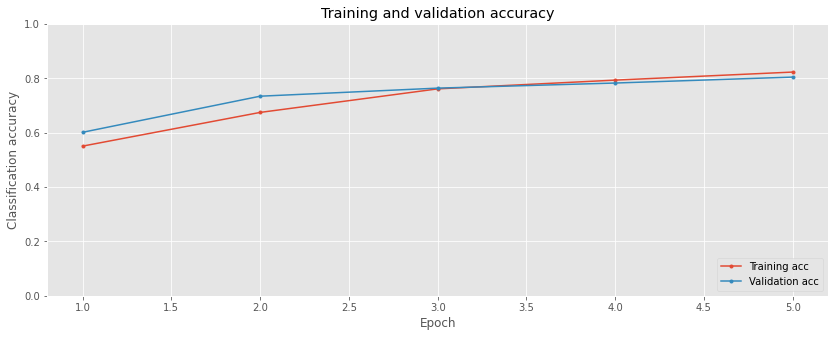

In [48]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### The TensorFlow embedding projector

The Tensorflow embedding projector can be found [here](https://projector.tensorflow.org/).

In [49]:
# Retrieve the embedding layer's weights from the trained model
weights = model.layers[1].get_weights()[0]


In [50]:
!dir

drive  sample_data


In [51]:
# Save the word Embeddings to tsv files
# Two files: 
#     one contains the embedding labels (meta.tsv),
#     one contains the embeddings (vecs.tsv)

import io
from os import path

out_v = io.open(path.join('/content/drive/MyDrive/vector_data', 'vecs.tsv'), 'w', encoding='utf-8')
out_m = io.open(path.join('/content/drive/MyDrive/vector_data', 'meta.tsv'), 'w', encoding='utf-8')

k = 0

for word, token in imdbWordIndex.items():
    if k != 0:
        out_m.write('\n')
        out_v.write('\n')
    
    out_v.write('\t'.join([str(x) for x in weights[token]]))
    out_m.write(word)
    k += 1
    
out_v.close()
out_m.close()
# beware large collections of embeddings!

---
<a id="coding_tutorial_5"></a>
## Recurrent neural network layers

#### Initialize and pass an input to a SimpleRNN layer

In [52]:
# Create a SimpleRNN layer and test it
simpleRnnLayer = tf.keras.layers.SimpleRNN(units = 16)


In [53]:
# Note that only the final cell output is returned

sequence = tf.constant([[[1.0,1.0],[2.0,2.0],[56.0,-100.0]]])
layerOutput = simpleRnnLayer(sequence)
layerOutput

<tf.Tensor: shape=(1, 16), dtype=float32, numpy=
array([[-0.9868478 , -1.        , -1.        ,  1.        , -1.        ,
        -1.        ,  1.        , -1.        , -0.29644123,  1.        ,
        -1.        , -1.        ,  1.        ,  1.        ,  0.9994723 ,
         1.        ]], dtype=float32)>

#### Load and transform the IMDB review sentiment dataset

In [54]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [55]:
# Load the dataset

(xTrain,yTrain),(xTest,yTest) = get_and_pad_imdb_dataset(maxlen=250)


In [56]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [57]:
# Get the word index using get_imdb_word_index()
imdbWordIndex = get_imdb_word_index()


#### Create a recurrent neural network model

In [58]:
# Get the maximum index value

maxIndexValue = max(imdbWordIndex.values())
embeddingDim = 16

In [59]:
# Using Sequential, build the model:
# 1. Embedding.
# 2. LSTM.
# 3. Dense.

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim = maxIndexValue+1,output_dim = embeddingDim,mask_zero=True),
                             tf.keras.layers.LSTM(units = 16),
                             tf.keras.layers.Dense(units = 1, activation="sigmoid")
])

#### Compile and fit the model

In [60]:
# Compile the model with binary cross-entropy loss

model.compile(
    loss = "binary_crossentropy",
    metrics = ["accuracy"],
    optimizer = "adam"
)

In [61]:
# Fit the model and save its training history
history = model.fit(xTrain,yTrain,epochs = 3, batch_size = 32,validation_split = 0.2)


Epoch 1/3
428/428 [==============================] - 121s 277ms/step - loss: 0.4625 - accuracy: 0.7789 - val_loss: 0.3298 - val_accuracy: 0.8683
Epoch 2/3
428/428 [==============================] - 113s 264ms/step - loss: 0.2376 - accuracy: 0.9124 - val_loss: 0.2928 - val_accuracy: 0.8823
Epoch 3/3
428/428 [==============================] - 110s 258ms/step - loss: 0.1594 - accuracy: 0.9440 - val_loss: 0.3048 - val_accuracy: 0.8730


#### Plot learning curves

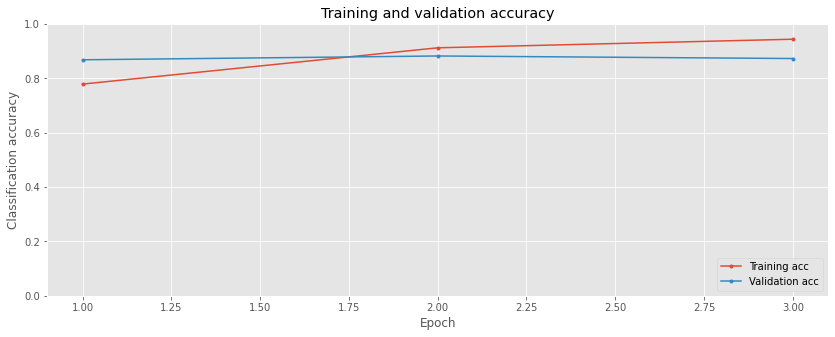

In [62]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### Make predictions with the model

In [63]:
# View the first test data example sentence
# (invert the word index)

invImdbWordIndex = {value:key for key , value in imdbWordIndex.items()}
[invImdbWordIndex[index] for index in xTest[0] if index > 2]

['please',
 'give',
 'this',
 'one',
 'a',
 'miss',
 'br',
 'br',
 'and',
 'the',
 'rest',
 'of',
 'the',
 'cast',
 'rendered',
 'terrible',
 'performances',
 'the',
 'show',
 'is',
 'flat',
 'flat',
 'flat',
 'br',
 'br',
 'i',
 "don't",
 'know',
 'how',
 'michael',
 'madison',
 'could',
 'have',
 'allowed',
 'this',
 'one',
 'on',
 'his',
 'plate',
 'he',
 'almost',
 'seemed',
 'to',
 'know',
 'this',
 "wasn't",
 'going',
 'to',
 'work',
 'out',
 'and',
 'his',
 'performance',
 'was',
 'quite',
 'so',
 'all',
 'you',
 'madison',
 'fans',
 'give',
 'this',
 'a',
 'miss']

In [64]:
# Get the model prediction using model.predict()
model.predict(xTest[None,0,:])


array([[0.18898007]], dtype=float32)

In [65]:
# Get the corresponding label

yTest[0]

0

---
<a id="coding_tutorial_6"></a>
## Stacked RNNs and the Bidirectional wrapper

#### Load and transform the IMDb review sentiment dataset

In [66]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [67]:
# Load the dataset

(xTrain,yTrain),(xTest,yTest) = get_and_pad_imdb_dataset(num_words=5000,maxlen=250)

In [68]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [69]:
# Get the word index using get_imdb_word_index()

imdbWordIndex = get_imdb_word_index(num_words = 5000)

#### Build stacked and bidirectional recurrent models

In [70]:
# Get the maximum index value and specify an embedding dimension

maxIndexValue = max(imdbWordIndex.values())
embedDims = 16

In [71]:
# Using Sequential, build a stacked LSTM model via return_sequences=True

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=maxIndexValue+1,output_dim=embedDims,mask_zero=True),
                             tf.keras.layers.LSTM(units = 32,return_sequences=True),
                             tf.keras.layers.LSTM(units = 32,return_sequences=False),
                             tf.keras.layers.Dense(units=1,activation="sigmoid"),

                             ])

In [72]:
# Using Sequential, build a bidirectional RNN with merge_mode='sum'
# Using Sequential, build a stacked LSTM model via return_sequences=True

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=maxIndexValue+1,output_dim=embedDims,mask_zero=True),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = 8),merge_mode="sum",backward_layer=tf.keras.layers.GRU(units = 8,go_backwards=True)),
                             tf.keras.layers.Dense(units=1,activation="sigmoid")

                             ])


In [73]:
# Create a model featuring both stacked recurrent layers and a bidirectional layer

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=maxIndexValue+1,output_dim=embedDims,mask_zero=True),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = 8,return_sequences=True),merge_mode = "concat"),
                             tf.keras.layers.GRU(units = 8,return_sequences=False),
                             tf.keras.layers.Dense(units=1,activation="sigmoid"),

                             ])

#### Compile and fit the model

In [74]:
# Compile the model

model.compile(
    loss = "binary_crossentropy",
    metrics = ["accuracy"],
    optimizer ="adam"
)

In [75]:
# Train the model, saving its history
history = model.fit(xTrain,yTrain,epochs = 3,validation_split=0.2,batch_size = 32)


Epoch 1/3
428/428 [==============================] - 335s 764ms/step - loss: 0.4499 - accuracy: 0.7704 - val_loss: 0.3200 - val_accuracy: 0.8704
Epoch 2/3
428/428 [==============================] - 323s 754ms/step - loss: 0.2496 - accuracy: 0.9035 - val_loss: 0.3158 - val_accuracy: 0.8785
Epoch 3/3
428/428 [==============================] - 323s 756ms/step - loss: 0.1815 - accuracy: 0.9349 - val_loss: 0.3166 - val_accuracy: 0.8777


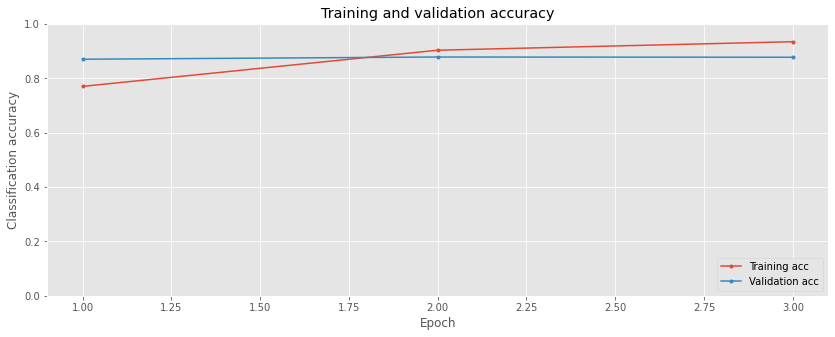

In [76]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);